<a href="https://colab.research.google.com/github/andresem/VolatilityForecasting/blob/main/VolatilityForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Volatility forecasting and liquidity: Evidence from individual stocks**
### Authors: *Peter Brous*, *Ufuk Ince* and *Ivilina Popova*
### Python implementation by *Andrés Felipe Echavarría Molina*

The objective of this code is to implement the methodology purposed by the authors to measure the volatility through historical methods and volatility implied methods.

In this document we will analyze the efficiency of the methods for main indexes of different countries.

All credits to the authors for their excellent job.

The article is avalible in:

https://link.springer.com/article/10.1057/jdhf.2009.17 

First we load the 2 years historical data for 6 indexes.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

brazil_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20Brazil%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
colombia_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20Colombia%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
nasdaq_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/Nasdaq%20100%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
mexico_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20Mexico%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
south_africa_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20South%20Africa%20Historical%20Data.csv', 
                            sep = ',', index_col = 0)
canada_data = pd.read_table('https://raw.githubusercontent.com/andresem/VolatilityForecasting/main/Data/MSCI%20Canada%20Historical%20Data.csv', 
                            sep = ',', index_col = 0) 

dataframes = [brazil_data, colombia_data, nasdaq_data, mexico_data, south_africa_data, canada_data]

for i in range(len(dataframes)):
  dataframes[i].index = pd.to_datetime(dataframes[i].index)

[]

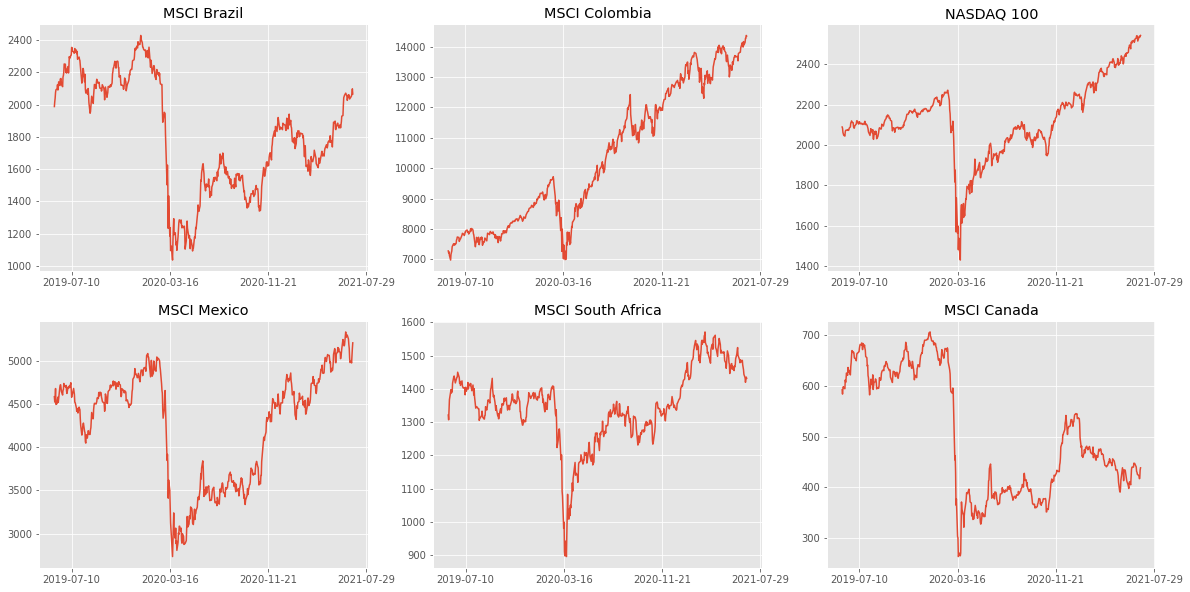

In [5]:
fig, axs = plt.subplots(2, 3)
locator = MaxNLocator(nbins = 4)

axs[0, 0].plot(dataframes[0]['Price'])
axs[0, 0].set_title("MSCI Brazil")
axs[0, 0].xaxis.set_major_locator(locator)

axs[0, 1].plot(dataframes[1]['Price'])
axs[0, 1].set_title("MSCI Colombia")
axs[0, 1].xaxis.set_major_locator(locator)

axs[0, 2].plot(dataframes[2]['Price'])
axs[0, 2].set_title("NASDAQ 100")
axs[0, 2].xaxis.set_major_locator(locator)

axs[1, 0].plot(dataframes[3]['Price'])
axs[1, 0].set_title("MSCI Mexico")
axs[1, 0].xaxis.set_major_locator(locator)

axs[1, 1].plot(dataframes[4]['Price'])
axs[1, 1].set_title("MSCI South Africa")
axs[1, 1].xaxis.set_major_locator(locator)

axs[1, 2].plot(dataframes[5]['Price'])
axs[1, 2].set_title("MSCI Canada")
axs[1, 2].xaxis.set_major_locator(locator)

plt.plot()

The authors purposes 5 different methods to measure volatility, 4 of them are for historical volatility and the last is to measure the implied volatility.
The volatility forecast measures are compared with a measure of realized volatility (RE) for $n$ trading days, the formula that describes this RE is:

## <center> $RE(n)_{t} = \sqrt{\cfrac{252}{n-1} \sum^{n-1}_{j=0}  \bigg{[} r_{t-j} -\bigg{(}\cfrac{\sum^{n-1}_{j=0} r_{t-j}} {n} \bigg{)} \bigg{]}^2}$</center>